The goal of this code is to take in images (of reduced resolution) and generate random patches of a specified dimension (ala point counting). The model will take in these images and generate classifications. 

In [1]:
import numpy as np
import patchify
from matplotlib import pyplot as plt 
from PIL import image

ModuleNotFoundError: No module named 'patchify'

In [ ]:
img = Image.open('image.jpg')
resized_img = img.resize((2000,3000)) #can use to resize image to given specifications
patches = patchify.patchify(np.asarray(resized_img), patch_size = (100,100, 3), step = 100)


In [12]:
# In numpy randomly
import numpy as np
from skimage import data
import matplotlib.pyplot as plt 
import math

def randomPatches(resized_img, patch_size, num_patches):
    collect = []
    for i in range(num_patches):
        img_to_arr = np.asarray(resized_img)
        x = np.random.randint(img_to_arr.shape[0]-patch_size)
        y = np.random.randint(img_to_arr.shape[1]-patch_size)
        random_patches = img_to_arr[x:x+patch_size, y:y + patch_size]
        collect.append(random_patches)
    return collect


(872, 1000, 3)


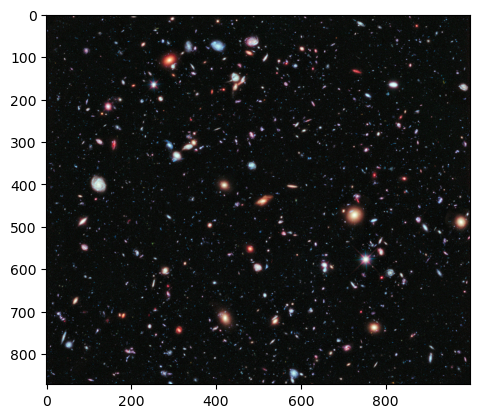

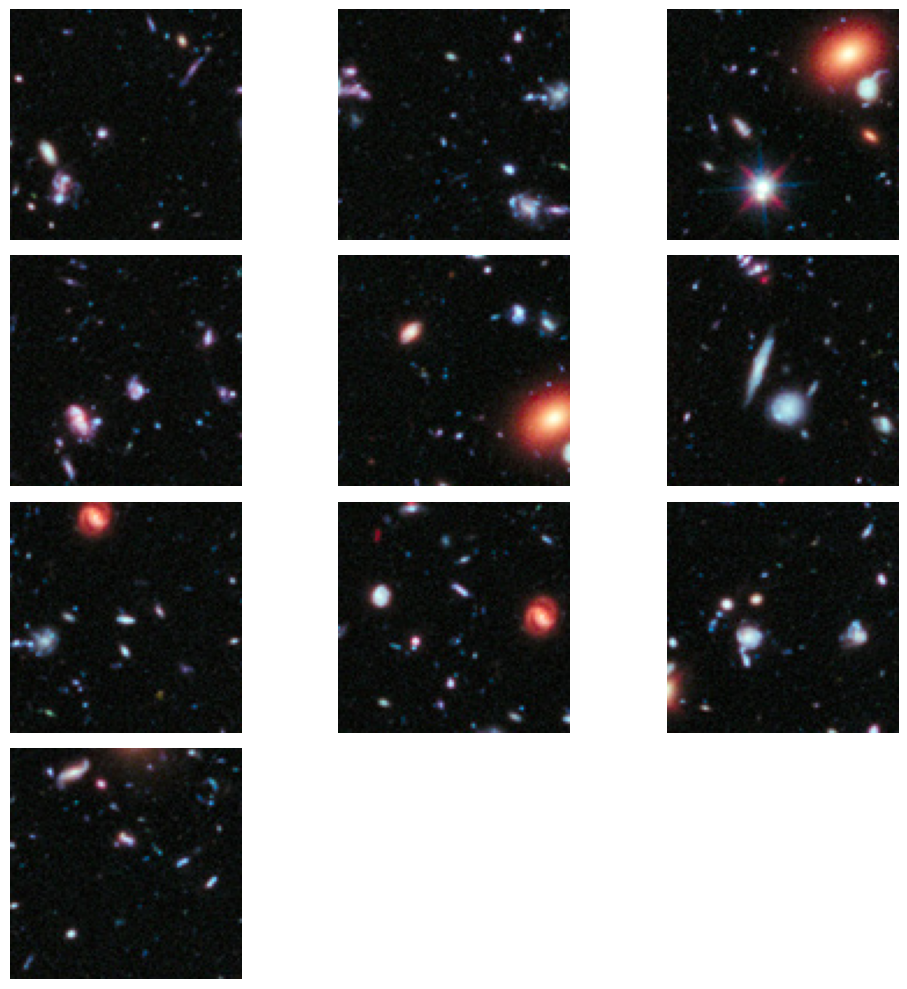

In [13]:
# Test on sklearn images
image = data.hubble_deep_field()
print(image.shape)
plt.imshow(image)

patches = randomPatches(image, 100, 10)

n = len(patches)
cols = int(math.sqrt(n))
rows = math.ceil(n/cols)
plt.figure(figsize = (10,10))
for i, patch in enumerate(patches):
    plt.subplot(rows, cols, i+1)
    plt.imshow(patch)
    plt.axis('off')
plt.tight_layout()
plt.show()

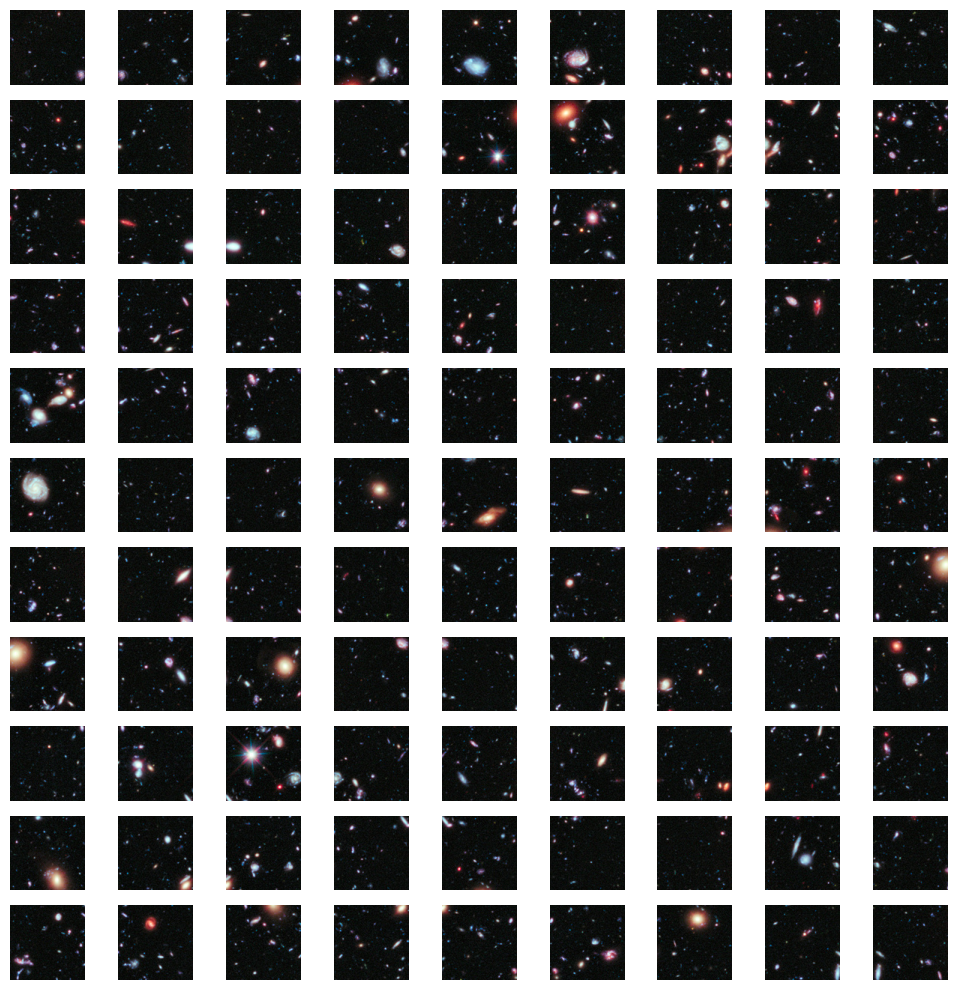

In [21]:
def patchGrid(resized_img, patch_size, overlap):
    step_size = patch_size - overlap
    height, width = resized_img.shape[:2]
    patches = []
    for y in range(0, height - patch_size + 1, step_size):
        for x in range(0, width - patch_size + 1, step_size):
            patch = resized_img[y:y+patch_size, x:x+patch_size]
            patches.append(patch)
    return patches

image = data.hubble_deep_field()

patches = patchGrid(image, 100, 10)

n = len(patches)
cols = int(math.sqrt(n))
rows = math.ceil(n/cols)
plt.figure(figsize = (10,10))
for i, patch in enumerate(patches):
    plt.subplot(rows, cols, i+1)
    plt.imshow(patch)
    plt.axis('off')
plt.tight_layout()
plt.show()
